### Predicting house price assignment

In [1]:
# import library
import pandas as pd

In [2]:
%matplotlib inline
import seaborn as sns; sns.set()

/home/fehiepsi/miniconda3/envs/notebook/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
# checking file name
!ls

home_data.csv  home_data.gl.zip  Predicting house prices.ipynb
home_data.gl   mooc.ipynb


In [3]:
# load data
df = pd.read_csv('home_data.csv')

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


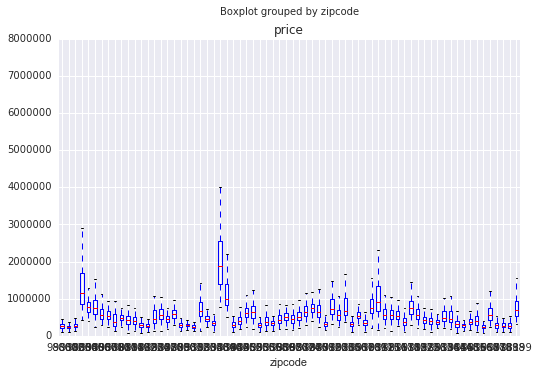

In [13]:
# plot as in lecture but cannot slice :(
df.boxplot(column='price',by='zipcode')

In [14]:
highest_mean_price_zipcode = 98039

In [16]:
# extract data with fixed zipcode
df1 = df[df.zipcode == highest_mean_price_zipcode]
# other way
df2 = df[df['zipcode'] == highest_mean_price_zipcode]

In [29]:
# get the mean price of above zipcode
print(df1.price.mean())
print(df2['price'].mean())

2160606.6
2160606.6


In [35]:
# filter data
df3 = df[(df.sqft_living > 2000) & (df.sqft_living <= 4000)]

In [76]:
# calculate the fraction of the above filtered data
print(len(df3) / len(df))

0.42187572294452413


In [59]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [60]:
df.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            21603, 21604, 21605, 21606, 21607, 21608, 21609, 21610, 21611,
            21612],
           dtype='int64', length=21613)

In [9]:
# select features to do regression algorithm
my_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']
advanced_features = [
'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode',
'condition', # condition of house				
'grade', # measure of quality of construction				
'waterfront', # waterfront property				
'view', # type of view				
'sqft_above', # square feet above ground				
'sqft_basement', # square feet in basement				
'yr_built', # the year built				
'yr_renovated', # the year renovated				
'lat', 'long', # the lat-long of the parcel				
'sqft_living15', # average sq.ft. of 15 nearest neighbors 				
'sqft_lot15', # average lot size of 15 nearest neighbors 
]

In [39]:
advanced_features

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'zipcode',
 'condition',
 'grade',
 'waterfront',
 'view',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [7]:
# import linear regression model
from sklearn import linear_model

In [43]:
# split data
from sklearn.cross_validation import train_test_split

df_train, df_test = train_test_split(df,  train_size=0.8, random_state=0)

In [4]:
df_train1 = pd.read_csv('train-data.csv')

In [5]:
df_test1 = pd.read_csv('test-data.csv')

In [8]:
# pick up model
my_model = linear_model.LinearRegression()
advanced_model = linear_model.LinearRegression()

In [10]:
# fit model
my_model.fit(df_train1[my_features], df_train1.price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
advanced_model.fit(df_train1[advanced_features], df_train1.price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
# import numpy
import numpy as np

In [26]:
# calculate root mean squared error (RMSE) = sqrt(rss / n)
my_rss_mean = np.mean((my_model.predict(df_test1[my_features]) - df_test1.price) ** 2)
my_rmse = np.sqrt(my_rss_mean)
advanced_rss_mean = np.mean((advanced_model.predict(df_test1[advanced_features])\
                             - df_test1.price) ** 2)
advanced_rmse = np.sqrt(advanced_rss_mean)
print(abs(my_rmse - advanced_rmse))

52262.6326216


In [54]:
df_test.price.mean()

529242.61068702291

In [55]:
my_model.predict(df_test[my_features]) .mean()

539580.10643992817

In [57]:
my_rss_mean, my_rmse

(59538329945.143997, 244004.77443104264)

In [61]:
advanced_rss_mean, advanced_rmse

(36280106854.23893, 190473.37570967479)

In [22]:
df_train1.price.mean()

539366.62822135293

In [15]:
sqft_model = linear_model.LinearRegression()

In [25]:
sqft_model.fit(df_train1.sqft_living.reshape(-1, 1), df_train1.price, fit_intercept=False)

TypeError: fit() got an unexpected keyword argument 'fit_intercept'

In [21]:
sqft_model.coef_

array([ 281.95883857])

In [18]:
sqft_model.intercept_

-47116.076574940002

In [19]:
df_test1.price.mean()

543054.04256325378

In [82]:
my_model.coef_

array([ -5.66006330e+04,   1.10870936e+04,   3.20408369e+02,
        -2.89499140e-01,  -2.41800491e+03,   6.17971071e+02])

In [83]:
advanced_model.coef_

array([ -3.46742831e+04,   3.94310007e+04,   1.12610340e+02,
         1.75888737e-01,   7.42456845e+03,  -5.67468805e+02,
         2.61695183e+04,   9.35901502e+04,   6.05600529e+05,
         5.27368893e+04,   7.27875902e+01,   3.98227501e+01,
        -2.60713698e+03,   2.01053038e+01,   6.04865961e+05,
        -2.22392029e+05,   2.42333853e+01,  -4.67450072e-01])

In [75]:
len(df_train)

17290

In [77]:
df_train.sqft_living.size

17290

### Do it again